In [114]:
import pandas as pd
import statistics
from matplotlib import pyplot as plt

import numpy as np
import sklearn.linear_model as skl
from sklearn.metrics import r2_score

from scipy import stats as st

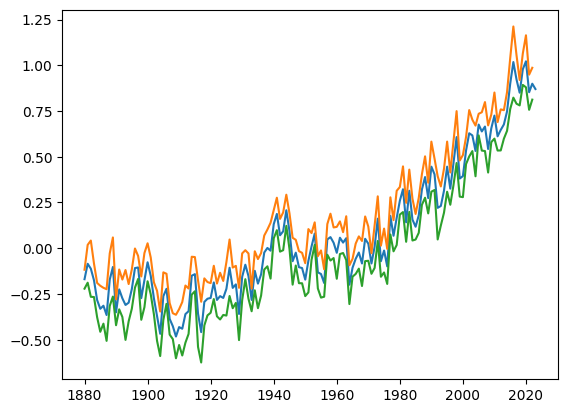

In [115]:
totale = pd.read_csv("/home/francesco/Codici/Computazionale/dc0/GLB.Ts+dSST.csv" , header = 1)
col = ['Year',"Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
totale[col] = totale[col].apply(pd.to_numeric, errors = 'coerce')

#Anni
Anni = totale['Year']

#medie per ano
totale.drop(['Year' , 'J-D' , 'DJF' , 'MAM' , 'JJA' , 'SON' , 'D-N'] , axis = 1 , inplace= True)
medie = totale.mean(axis = 1 , skipna= True , numeric_only= True)

#devstd
devstd = totale.T.std()

#DataFrame
totale = {'Year' : Anni , 'Median' : medie  , 'Devstd' : devstd}
Nasa = pd.DataFrame(totale)

plt.plot(Nasa['Year'] , Nasa['Median'])
plt.plot(Nasa['Year'] , Nasa['Median'] + Nasa['Devstd'])
plt.plot(Nasa['Year'] , Nasa['Median'] - Nasa['Devstd'])

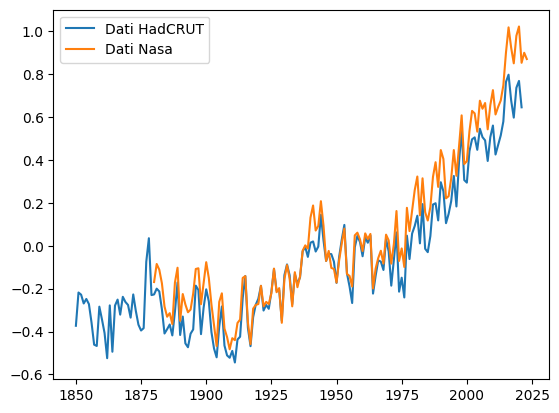

In [116]:
indice = ["Year" , "Median", 11 , 12 ,5,6,7,8,9,10,'Min','Max']
Had = pd.read_fwf("HadCRUT_Totale_Annuale.txt" , header = None , names = indice)
Had = Had.drop([5,6,7,8,9,10,11,12] , axis = 1)

plt.plot(Had['Year'] , Had['Median'] , label = "Dati HadCRUT")
plt.plot(Nasa['Year'] , Nasa['Median'] , label = "Dati Nasa")
plt.legend()